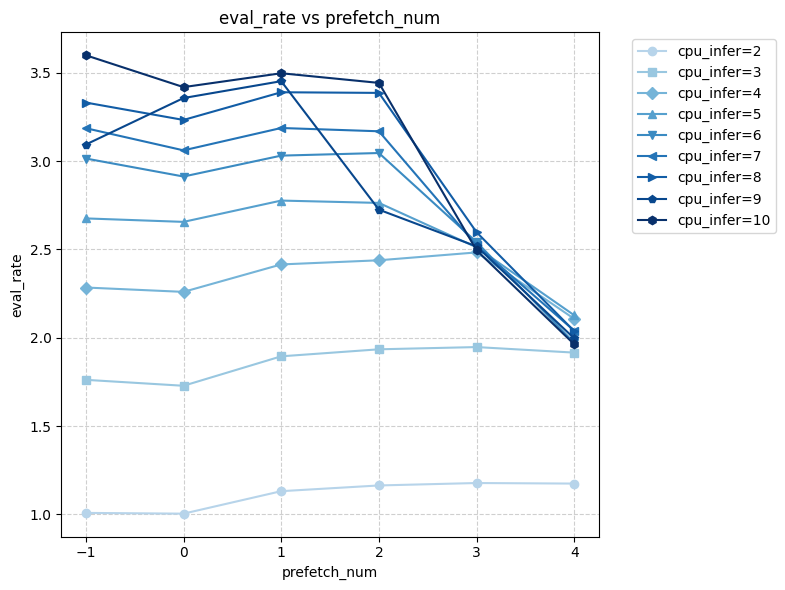

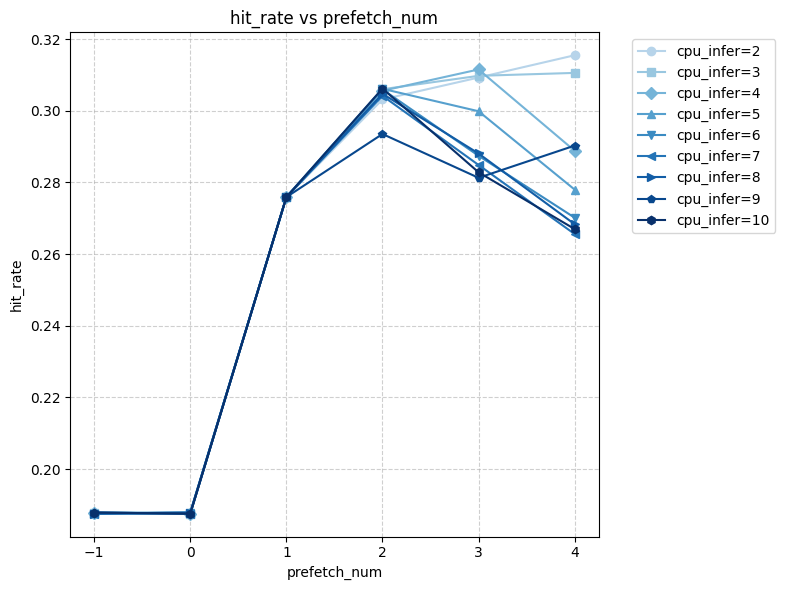

In [4]:
#!/usr/bin/env python
# coding: utf-8

# ## 绘制实验结果折线图
# 读取 experiment_results.csv 文件，并绘制两个折线图：
# 1. eval_rate vs prefetch_num
# 2. hit_rate vs prefetch_num
# 横轴为 prefetch_num，
# 不同 cpu_infer 用颜色深浅和点形状区分，legend 放在图外。

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 读取 CSV 文件
csv_file = "./experiment_results.csv"
df = pd.read_csv(csv_file)

# 获取 cpu_infer 的所有取值
cpu_infers = sorted(df["cpu_infer"].unique())

# 定义颜色映射和标记样式
colors = cm.Blues(np.linspace(0.3, 1, len(cpu_infers)))
markers = ["o", "s", "D", "^", "v", "<", ">", "p", "h", "x", "*"]

# 绘制 eval_rate 折线图
plt.figure(figsize=(8,6))
for i, cpu_infer in enumerate(cpu_infers):
    group = df[df["cpu_infer"] == cpu_infer]
    plt.plot(group["prefetch_num"], group["eval_rate"], 
             marker=markers[i % len(markers)], 
             color=colors[i], 
             label=f"cpu_infer={cpu_infer}")

plt.xlabel("prefetch_num")
plt.ylabel("eval_rate")
plt.title("eval_rate vs prefetch_num")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # 图例放在右侧外部
plt.tight_layout()
plt.show()

# 绘制 hit_rate 折线图
plt.figure(figsize=(8,6))
for i, cpu_infer in enumerate(cpu_infers):
    group = df[df["cpu_infer"] == cpu_infer]
    plt.plot(group["prefetch_num"], group["hit_rate"], 
             marker=markers[i % len(markers)], 
             color=colors[i], 
             label=f"cpu_infer={cpu_infer}")

plt.xlabel("prefetch_num")
plt.ylabel("hit_rate")
plt.title("hit_rate vs prefetch_num")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # 图例放在右侧外部
plt.tight_layout()
plt.show()